In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from glob import glob
from sklearn import model_selection, svm, naive_bayes, tree, ensemble, neighbors

In [4]:
import vdetect

In [5]:
imfiles_0 = vdetect.create_image_files_list('../non-vehicles')
imfiles_1 = vdetect.create_image_files_list('../vehicles')

print('# vehicle examples:', len(imfiles_1))
print('# non-vehicle examples:', len(imfiles_0))

# vehicle examples: 8792
# non-vehicle examples: 8968


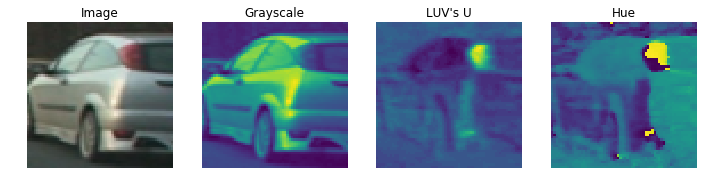

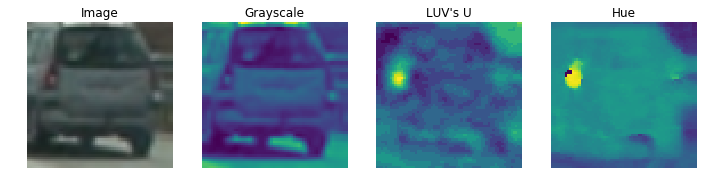

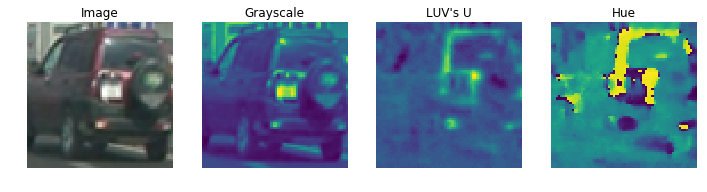

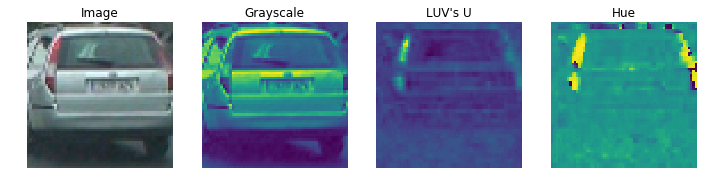

In [6]:
for imfile in imfiles_1[2:6]:
    
    im = vdetect.open_image(imfile, convert_to_rgb=True)  
    LUV_channels = vdetect.convert_colorspace_and_get_channels(im, cv2.COLOR_RGB2LUV)
    HLS_channels = vdetect.convert_colorspace_and_get_channels(im, cv2.COLOR_RGB2HLS)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(im)
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow( cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) )
    plt.title('Grayscale')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(LUV_channels[1])
    plt.title("LUV's U")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(HLS_channels[0])
    plt.title('Hue')
    plt.axis('off')    


In [7]:
feature_sets = ('hog', 'binned', 'hist')
lists_of_feature_vecs = {k: [] for k in feature_sets}

for imfile in imfiles_1[:100]:
    im = vdetect.open_image(imfile)  

    hog, binned, hist = vdetect.extract_features(im)
 
    lists_of_feature_vecs['hog'].append(hog)
    lists_of_feature_vecs['binned'].append(binned)
    lists_of_feature_vecs['hist'].append(hist)

train = dict()
test = dict()
for k, lst in lists_of_feature_vecs.items():
    x_train, x_test = vdetect.split_and_scale_features(lst)
    train[k] = x_train
    test[k] = x_test
    
all_train = np.hstack([train[k] for k in feature_sets])
all_test = np.hstack([test[k] for k in feature_sets])

In [8]:
for k in feature_sets:
    print(k, train[k].shape, test[k].shape)
    
print('all', all_train.shape, all_test.shape)

hog (75, 1764) (25, 1764)
binned (75, 1024) (25, 1024)
hist (75, 160) (25, 160)
all (75, 2948) (25, 2948)


In [9]:
X_train, y_train, X_test, y_test = vdetect.prepare_train_test_data(imfiles_0[:100], imfiles_1[:100])

In [10]:
X_train.shape, y_train.shape

((150, 2948), (150,))